In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

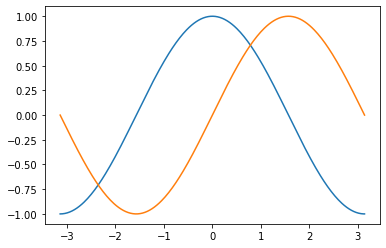

In [3]:

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S)

plt.show()

In [4]:
import sympy as sym

In [5]:
from sympy import Symbol as S

In [6]:
def new_matrix(symbol, rows, columns=None):
    if not columns:
        columns = rows
    return sym.Matrix([
        [ S('{}_{}{}'.format(symbol, i, j))
          for j in range(0, columns)
        ] for i in range(0, rows) ])
new_matrix('x', 5)

Matrix([
[x_00, x_01, x_02, x_03, x_04],
[x_10, x_11, x_12, x_13, x_14],
[x_20, x_21, x_22, x_23, x_24],
[x_30, x_31, x_32, x_33, x_34],
[x_40, x_41, x_42, x_43, x_44]])

In [7]:
def gauss_diagonal(matrix, diagonal):
    matrix = sym.Matrix(matrix)
    coeff = matrix.row(diagonal)[diagonal]
    matrix.row_op(diagonal, lambda value, index: value / coeff)
    return matrix

def gauss_eliminate_single(matrix, diagonal, row):
    matrix = sym.Matrix(matrix)
    coeff = matrix.row(row)[diagonal]
    matrix.row_op(row, lambda value, index: value - matrix.row(diagonal)[index] * coeff)
    return matrix
mm2=gauss_eliminate_single(gauss_diagonal(new_matrix('a', 3), 0), 0, 1)
mm2

Matrix([
[   1,             a_01/a_00,             a_02/a_00],
[   0, a_11 - a_01*a_10/a_00, a_12 - a_02*a_10/a_00],
[a_20,                  a_21,                  a_22]])

In [19]:
mma = new_matrix('a', 3, 3)
mmb = new_matrix('b', 3, 1)

mls = sym.BlockMatrix([mma, mmb]).as_explicit()
mls

minv = sym.BlockMatrix([mma, sym.Identity(3)]).as_explicit()

minv
# все главные угловые миноры ненулевые

Matrix([
[a_00, a_01, a_02, 1, 0, 0],
[a_10, a_11, a_12, 0, 1, 0],
[a_20, a_21, a_22, 0, 0, 1]])

In [12]:
gauss_eliminate_single(gauss_diagonal(new_matrix('a', 4), 0), 0, 1)

Matrix([
[   1,             a_01/a_00,             a_02/a_00,             a_03/a_00],
[   0, a_11 - a_01*a_10/a_00, a_12 - a_02*a_10/a_00, a_13 - a_03*a_10/a_00],
[a_20,                  a_21,                  a_22,                  a_23],
[a_30,                  a_31,                  a_32,                  a_33]])

In [13]:
gauss_eliminate_single(_, 0, 2)

Matrix([
[   1,             a_01/a_00,             a_02/a_00,             a_03/a_00],
[   0, a_11 - a_01*a_10/a_00, a_12 - a_02*a_10/a_00, a_13 - a_03*a_10/a_00],
[   0, a_21 - a_01*a_20/a_00, a_22 - a_02*a_20/a_00, a_23 - a_03*a_20/a_00],
[a_30,                  a_31,                  a_32,                  a_33]])

In [14]:
gauss_eliminate_single(_, 0, 3)

Matrix([
[1,             a_01/a_00,             a_02/a_00,             a_03/a_00],
[0, a_11 - a_01*a_10/a_00, a_12 - a_02*a_10/a_00, a_13 - a_03*a_10/a_00],
[0, a_21 - a_01*a_20/a_00, a_22 - a_02*a_20/a_00, a_23 - a_03*a_20/a_00],
[0, a_31 - a_01*a_30/a_00, a_32 - a_02*a_30/a_00, a_33 - a_03*a_30/a_00]])